**Analysis of weekly traffic in Austin.**

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
from matplotlib import pyplot as plt
import numpy as np
!pip install matrixprofile 
import matrixprofile as mp

**Required Libraries**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py



In [113]:
data=df =pd.read_csv('/content/drive/MyDrive/daily_average_road_intersection_traffic_volume[1].csv')  
data

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


**As the data contains some null values so I assigned them with the mean value for that particular day.**

In [114]:

data['monday'].fillna(value=24165.405893, inplace=True)
data['tuesday'].fillna(value=24961.200737, inplace=True)
data['wednesday'].fillna(value=25315.679089, inplace=True)
data['thursday'].fillna(value=25260.732173, inplace=True)
data['friday'].fillna(value=26322.776365, inplace=True)
data['saturday'].fillna(value=22405.154244, inplace=True)
data['sunday'].fillna(value=18729.522118, inplace=True)

In [115]:
data.drop_duplicates(inplace=True)

In [116]:
data.head(10)
df=data
df

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


**Renaming the columns of the days as monday being 1 and sunday being 7.**

In [117]:
data.rename(columns = {'monday' : '1', 'tuesday' : '2','wednesday':'3','thursday':'4','friday':'5','saturday':'6','sunday':'7'}, inplace = True)
data.head(7)

,year,week_of_year,1,2,3,4,5,6,7
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
5,2020,7,32596.166667,32916.083333,33823.833333,36364.333333,36591.583333,28695.666667,24955.750000
6,2020,8,33654.545455,34235.750000,34390.583333,36630.000000,39295.454545,30123.166667,24055.333333


**Some data transformation so that we can do the required analysis.**

In [118]:
day=[]
tra=[]
ind=[]

In [119]:
for i in range(67):
  g=i+2
  for j in range(7):
    j=j+2
    day.append(data.columns[j])
    tra.append(data.iloc[i,j])
    
    ind.append(g)
len(ind)

469

In [120]:
len(day)

469

In [121]:
len(tra)

469

In [122]:
lis=[ind,day,tra]

In [123]:
dfinal=pd.DataFrame(list(zip(ind,day,tra)), columns =['Week Number', 'Day','Traffic'])
dfinal

,Week Number,Day,Traffic
0,2,1,24165.405893
1,2,2,33166.416667
2,2,3,33764.416667
3,2,4,33971.166667
4,2,5,32076.666667
...,...,...,...
464,68,3,25315.679089
465,68,4,25260.732173
466,68,5,9857.166667
467,68,6,17116.250000


In [124]:
dfinal.isnull().sum()

Week Number    0
Day            0
Traffic        0
dtype: int64

In [125]:
dfinal.columns

Index(['Week Number', 'Day', 'Traffic'], dtype='object')

In [126]:

x = dfinal[['Week Number','Traffic']].values

**find the optimal number of clusters using elbow method  -- >This is for 2 features = [Week Number,Traffic]**



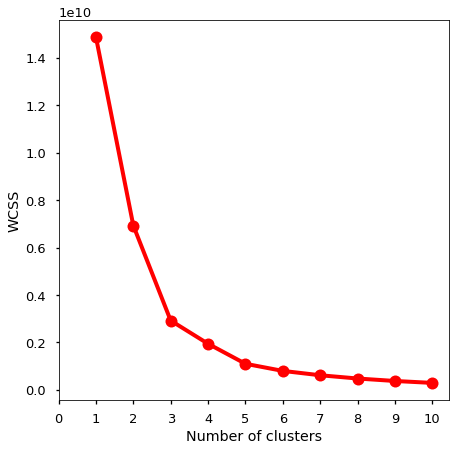

In [127]:


WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**From the curve we can interpret that 5 is optimal for clustering.**

In [128]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



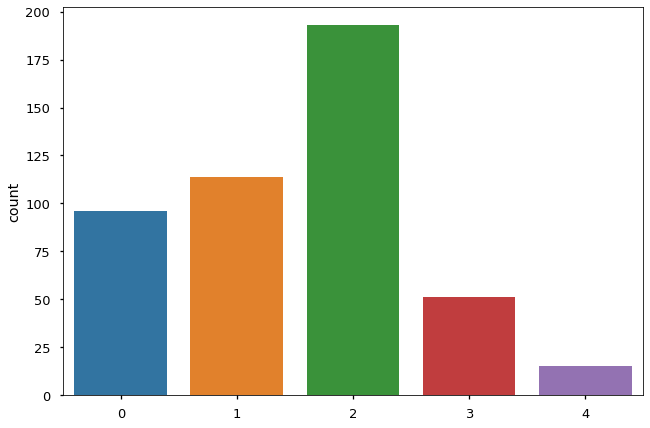

In [129]:
sns.countplot(y_clusters)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

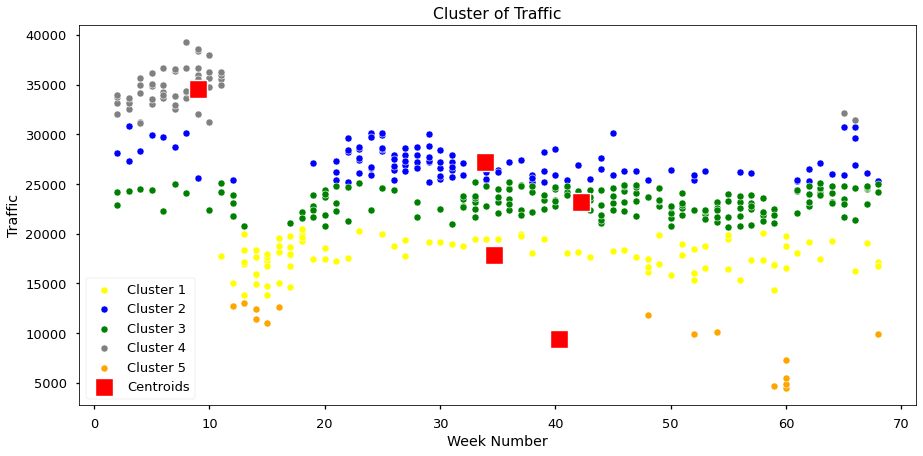

In [130]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_clusters == 4, 0], x[y_clusters == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster of Traffic')
plt.xlabel('Week Number')
plt.ylabel('Traffic')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

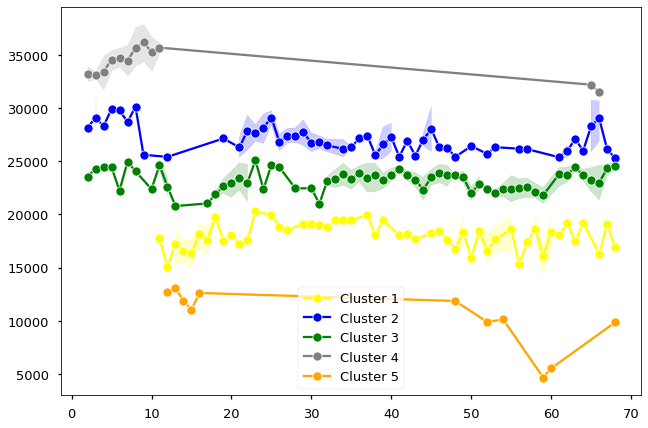

In [131]:
sns.lineplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',marker="o")
sns.lineplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',marker="o")
sns.lineplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',marker="o")
sns.lineplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',marker="o")
sns.lineplot(x[y_clusters == 4, 0], x[y_clusters == 4, 1], color = 'orange', label = 'Cluster 5',marker="o")
plt.show()

In [132]:
busiest_day = dfinal.groupby(["Week Number"]).sum() #.sort_values("Traffic",ascending=False)
busiest_day = busiest_day.reset_index()
busiest_day

,Week Number,Traffic
0,2,208249.572560
1,3,215042.916667
2,4,219855.250000
3,5,227060.000000
4,6,225551.416667
...,...,...
62,64,163662.142857
63,65,181901.083333
64,66,180903.839286
65,67,166848.285714


In [133]:
busiest_day.head()

,Week Number,Traffic
0,2,208249.572560
1,3,215042.916667
2,4,219855.250000
3,5,227060.000000
4,6,225551.416667


In [134]:
x = busiest_day[['Week Number','Traffic']].values

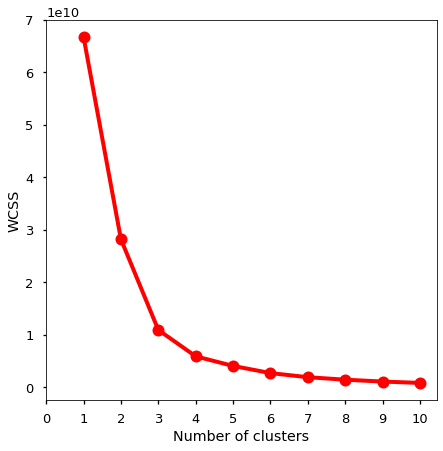

In [135]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [136]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



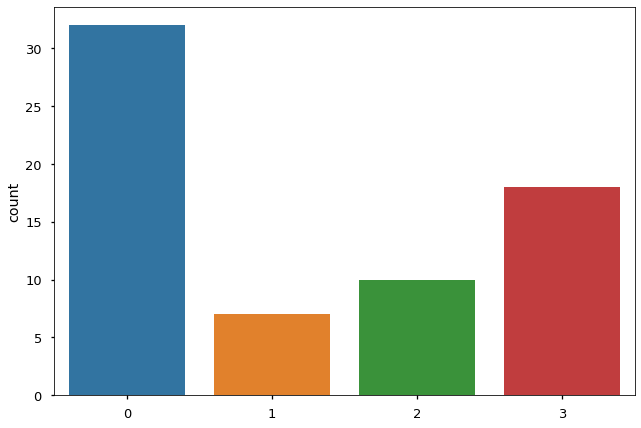

In [137]:
sns.countplot(y_clusters)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

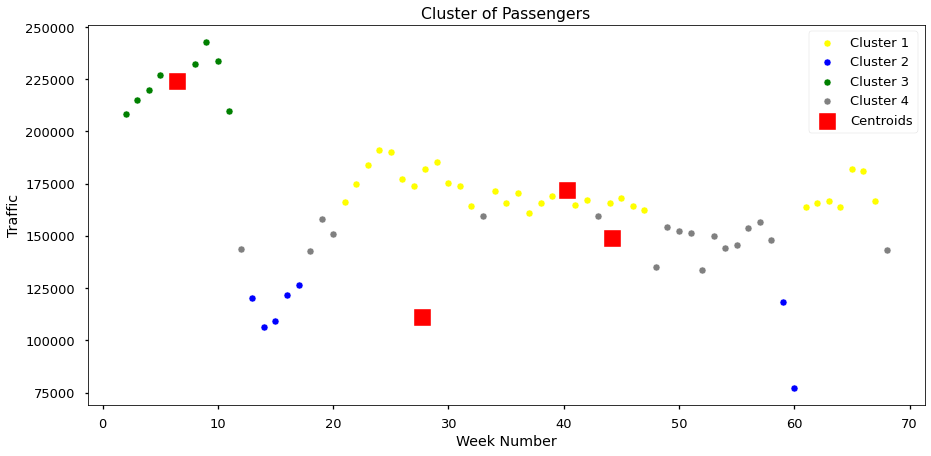

In [138]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(x[y_clusters == 4, 0], x[y_clusters == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster of Passengers')
plt.xlabel('Week Number')
plt.ylabel('Traffic')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

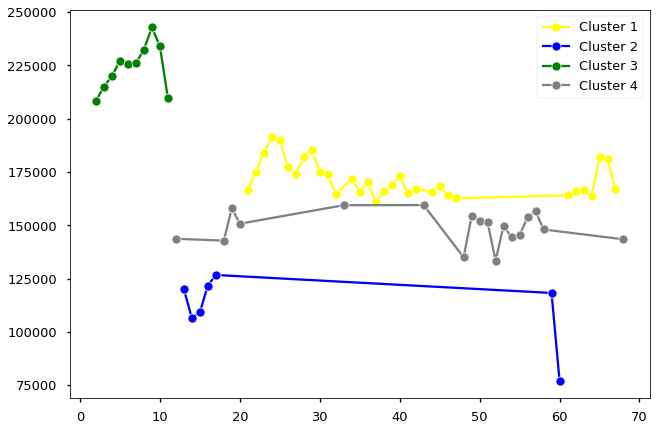

In [139]:
sns.lineplot(x[y_clusters == 0, 0], x[y_clusters == 0, 1], color = 'yellow', label = 'Cluster 1',marker="o")
sns.lineplot(x[y_clusters == 1, 0], x[y_clusters == 1, 1], color = 'blue', label = 'Cluster 2',marker="o")
sns.lineplot(x[y_clusters == 2, 0], x[y_clusters == 2, 1], color = 'green', label = 'Cluster 3',marker="o")
sns.lineplot(x[y_clusters == 3, 0], x[y_clusters == 3, 1], color = 'grey', label = 'Cluster 4',marker="o")
plt.show()

In [140]:
dfinal.head()

,Week Number,Day,Traffic
0,2,1,24165.405893
1,2,2,33166.416667
2,2,3,33764.416667
3,2,4,33971.166667
4,2,5,32076.666667


**Day wise plot wrt traffic**

**Now we will explore matrix profile for the data with 3 window sizes viz 4 days , 7 days and 12 days**


In [141]:
windows = [
    ('4 days', 4),
    ('7 days', 8),
    ('12 days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(dfinal['Traffic'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

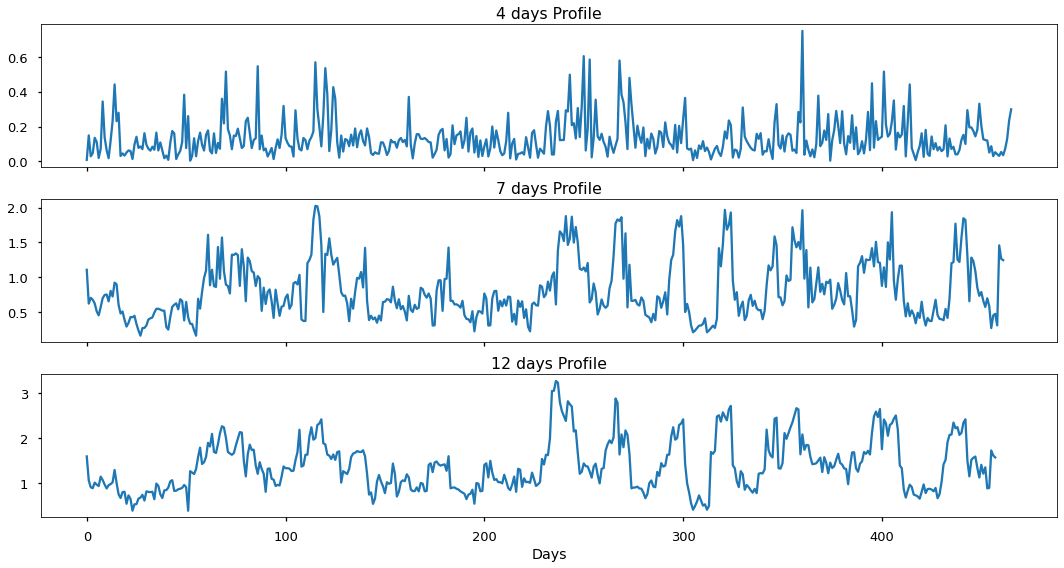

In [142]:
#Plot the signal data
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,8))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Days')
plt.tight_layout()
plt.show()

**Here we find the top anomalies for each window. An exclusion zone is required to avoid matching on time periods that are very close to one another.**

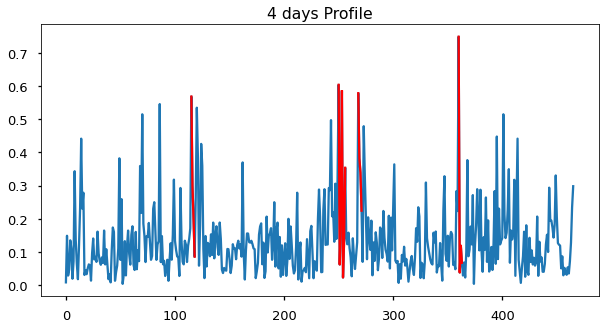

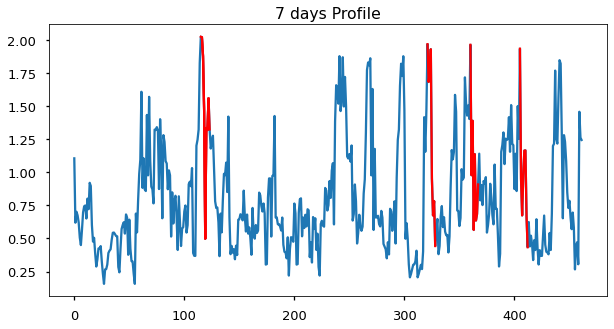

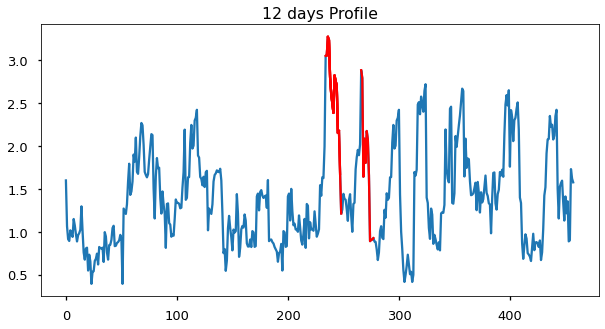

In [143]:


for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(10, 5))
    ax = plt.plot(dfinal.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = dfinal.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

**Separate analysis of 7 Days profile.**

In [144]:

key = '7 days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
dfinal[key] = mp_adjusted

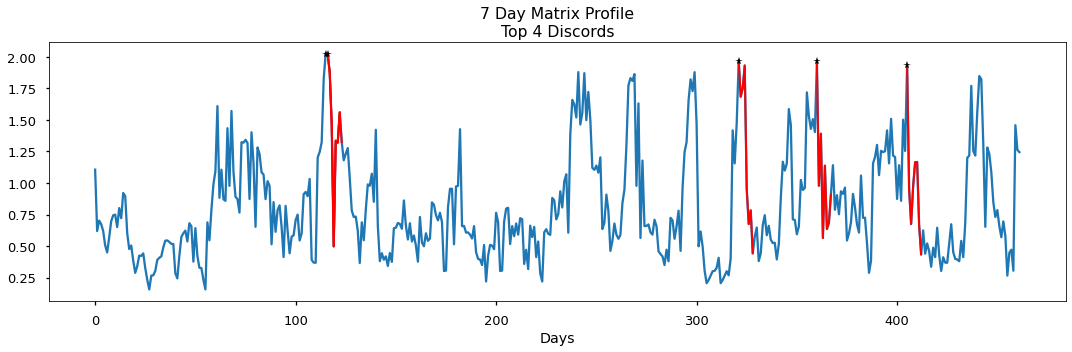

In [145]:
ax = dfinal[key].plot(title='7 Day Matrix Profile\nTop 4 Discords', figsize=(15,5))

for discord in profile['discords']:
    dfinal.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

dfinal.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [146]:
dfinal.head(20)

,Week Number,Day,Traffic,7 days Profile
0,2,1,24165.405893,1.105819
1,2,2,33166.416667,0.619175
2,2,3,33764.416667,0.701623
3,2,4,33971.166667,0.674458
4,2,5,32076.666667,0.620369
5,2,6,28167.583333,0.505903
6,2,7,22937.916667,0.449872
7,3,1,30811.750000,0.566689
8,3,2,32568.333333,0.697103
9,3,3,33294.250000,0.743672


In [147]:
dfinal.columns

Index(['Week Number', 'Day', 'Traffic', '7 days Profile'], dtype='object')

In [148]:
del dfinal['Week Number']

In [149]:
del dfinal['7 days Profile']

In [150]:
dfinal

,Day,Traffic
0,1,24165.405893
1,2,33166.416667
2,3,33764.416667
3,4,33971.166667
4,5,32076.666667
...,...,...
464,3,25315.679089
465,4,25260.732173
466,5,9857.166667
467,6,17116.250000


In [151]:
busiest_day = dfinal.groupby(["Day"]).sum().sort_values("Traffic",ascending=False)
busiest_day = busiest_day.reset_index()
busiest_day

,Day,Traffic
0,5,1.763626e+06
1,3,1.696150e+06
2,4,1.692469e+06
3,2,1.672400e+06
4,1,1.619082e+06
5,6,1.501145e+06
6,7,1.254878e+06


**Now I have plotted a bar graph of days vs total traffic**

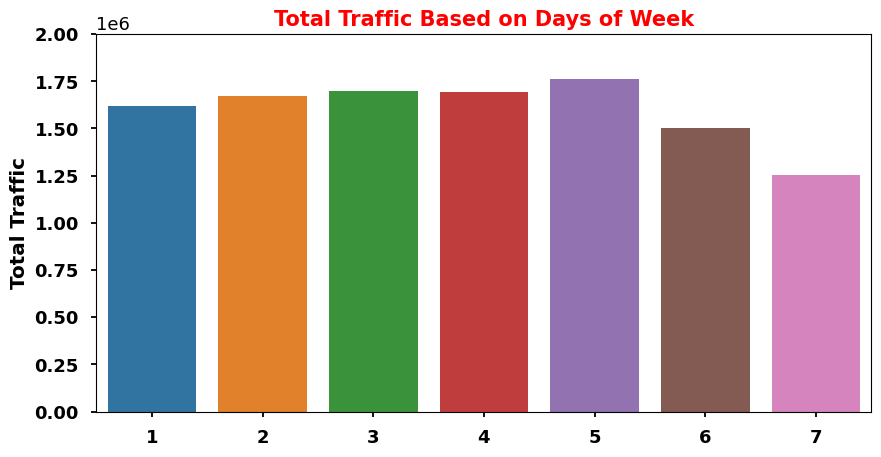

In [152]:
plt.figure(figsize=(10,5),dpi=100),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="Day",y="Traffic",data=busiest_day, order=["1","2","3","4",
                                                                       "5","6","7"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,2000000)
plt.show()

**From plot we can infer that friday has maximum traffic and sunday has lowest.**

Submitted by :

**Sakshi Pandey**

Indian Institute Of Technology ,Indore